### 회귀(Regression)
* 연속형 값 예측(Y값)
* 예) 집값, 매출액

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [13]:
# (pred == y_test).mean() # 연속형 변수이기때문에 실제값과 동일할 수 없다

0.0

In [14]:
pred[:3], y_test[:3]

(array([20.99033625, 28.2458418 , 10.45046249]),
 255    20.9
 217    28.7
 415     7.2
 Name: MEDV, dtype: float64)

### 회귀분석 평가지표
* MSE (Mean Squared Error)
  - 예측한 값과 실제값의 차이를 제곱한 평균
* MAE (Mean Absolute Error)
  - 예측한 값과 실제값의 차이의 절대값을 평균낸 것
* RMSE (Root Mean Squared Error)
  - MSE값에 루트를 씌운 값


In [15]:
y_ = np.array([3,4,5])
y = np.array([1,2,3])

In [16]:
# MSE
def mse(y_, y) :
    return ((y_-y)**2).mean()

In [17]:
mse(y_, y)

4.0

In [18]:
# MAE
def mae(y_, y):
    return np.abs(y_-y).mean()

In [19]:
mae(y_, y)

2.0

In [20]:
# RMSE
def rmse(y_, y):
    return np.sqrt(((y_-y)**2).mean())

In [21]:
rmse(y_,y)

2.0

In [22]:
# 사이킷런 - MAE, MSE는 이미 구현이 되어있음
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_, y), mean_squared_error(y_, y)

(2.0, 4.0)

In [23]:
mean_squared_error(pred, y_test)

29.066410645265933

In [24]:
mean_absolute_error(pred, y_test)

3.598423859378871

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

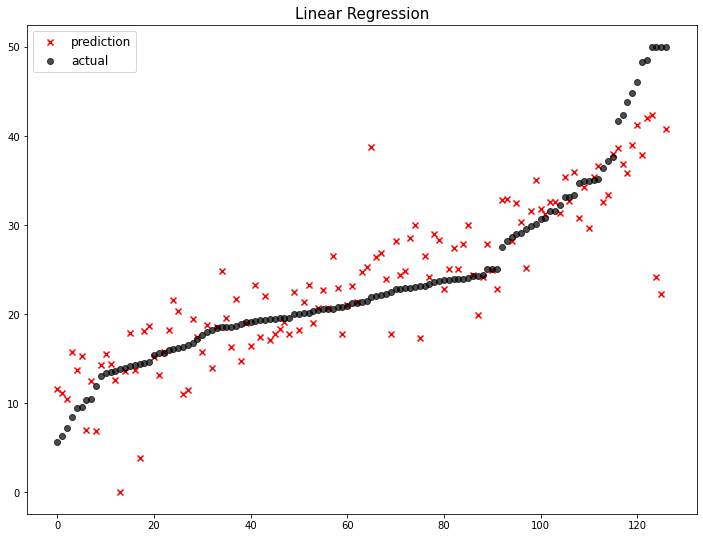

               model        mse
0  Linear Regression  29.066411


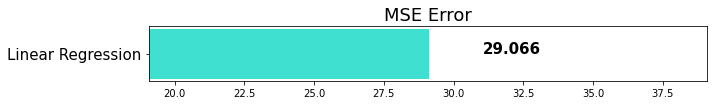

In [26]:
mse_eval('Linear Regression', pred, y_test) # 한꺼번에 비교값을 보기 위함

### Regularization (규제)
* 과적합을 줄이기 위해 페널티를 부여

#### L1 규제
* 가중치의 합을 더한 값에 규제강도를 곱함
* 더한 값이 0이 되는 문제가 있음
* MSE + a|w|
* Lasso (라쏘)

#### L2 규제
* 가중치 제곱의 합에 규제강도를 곱함
* 규제강도가 커지면 가중치 감소, 규제강도가 작아지면 가중치는 증가함
* MSE + aw**2
* Ridge (릿지)

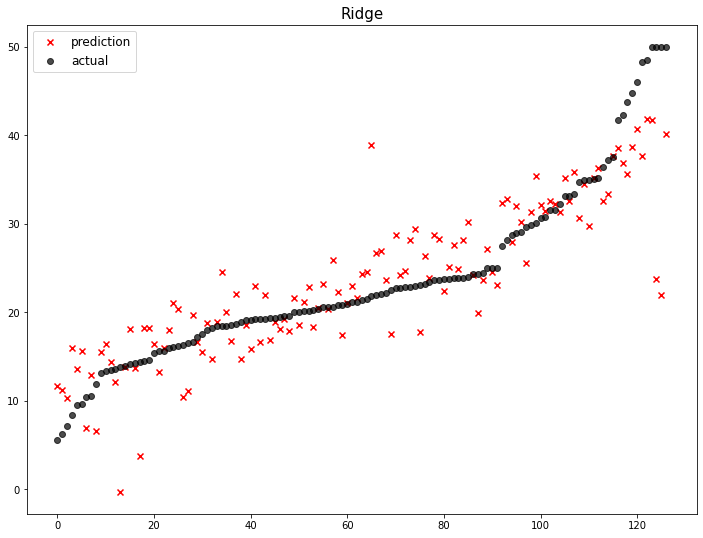

               model        mse
0              Ridge  29.675836
1  Linear Regression  29.066411


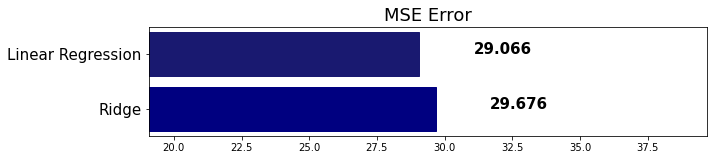

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge', pred, y_test)

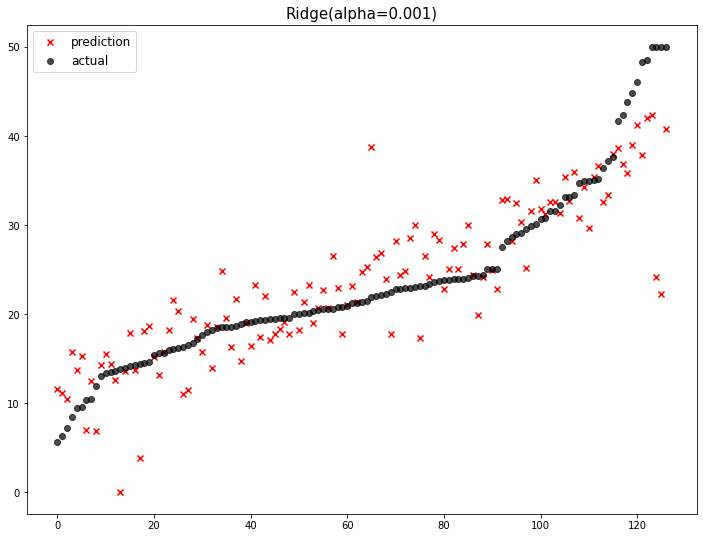

                model        mse
0               Ridge  29.675836
1  Ridge(alpha=0.001)  29.067346
2   Linear Regression  29.066411


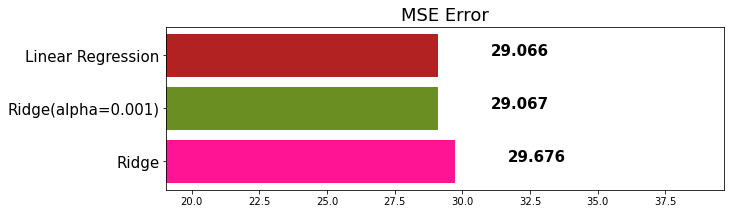

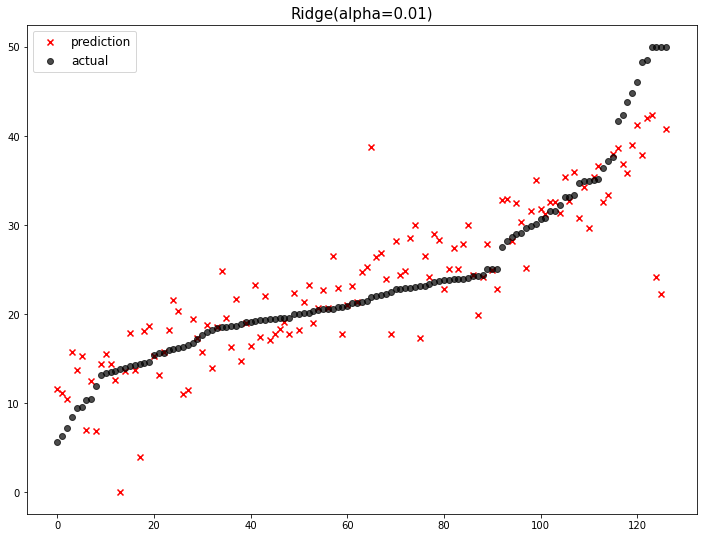

                model        mse
0               Ridge  29.675836
1   Ridge(alpha=0.01)  29.075733
2  Ridge(alpha=0.001)  29.067346
3   Linear Regression  29.066411


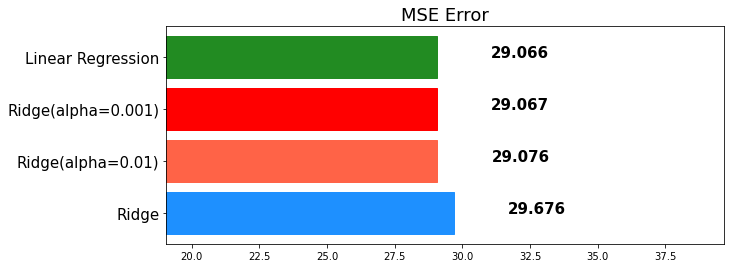

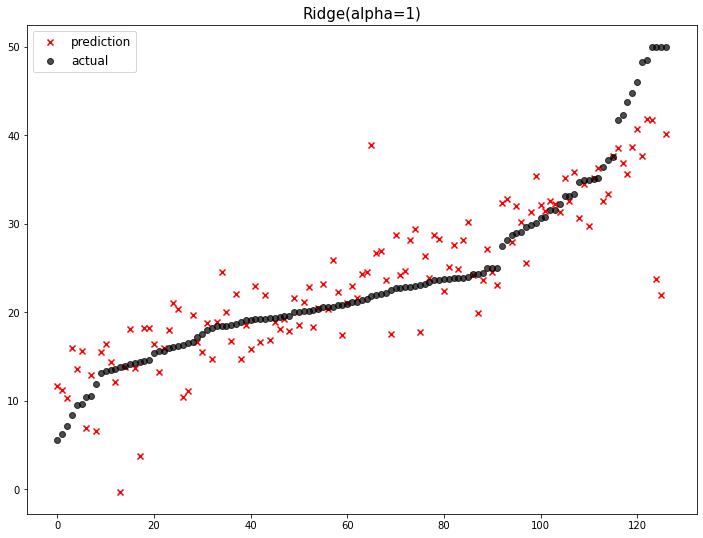

                model        mse
0               Ridge  29.675836
1      Ridge(alpha=1)  29.675836
2   Ridge(alpha=0.01)  29.075733
3  Ridge(alpha=0.001)  29.067346
4   Linear Regression  29.066411


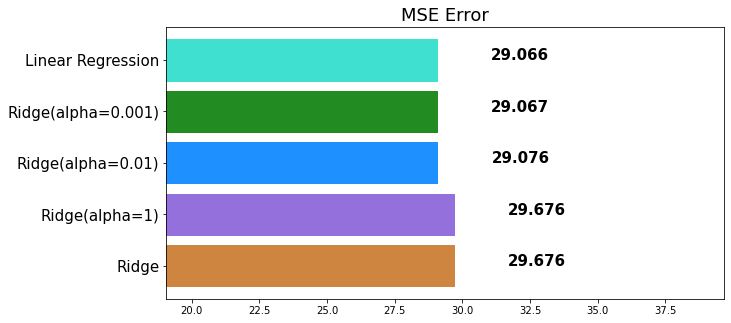

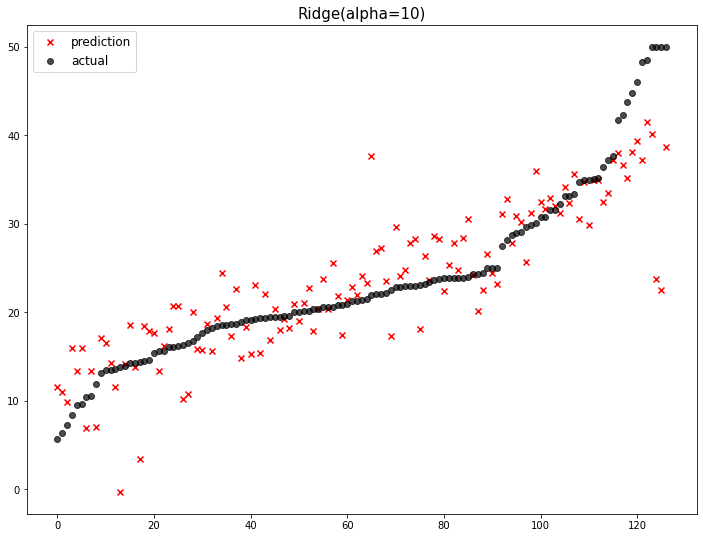

                model        mse
0     Ridge(alpha=10)  30.203143
1               Ridge  29.675836
2      Ridge(alpha=1)  29.675836
3   Ridge(alpha=0.01)  29.075733
4  Ridge(alpha=0.001)  29.067346
5   Linear Regression  29.066411


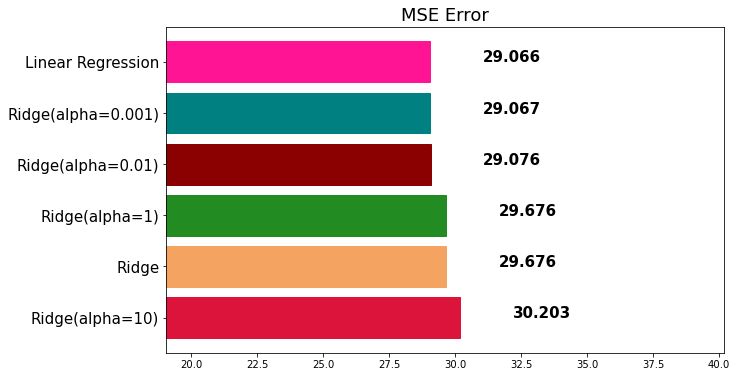

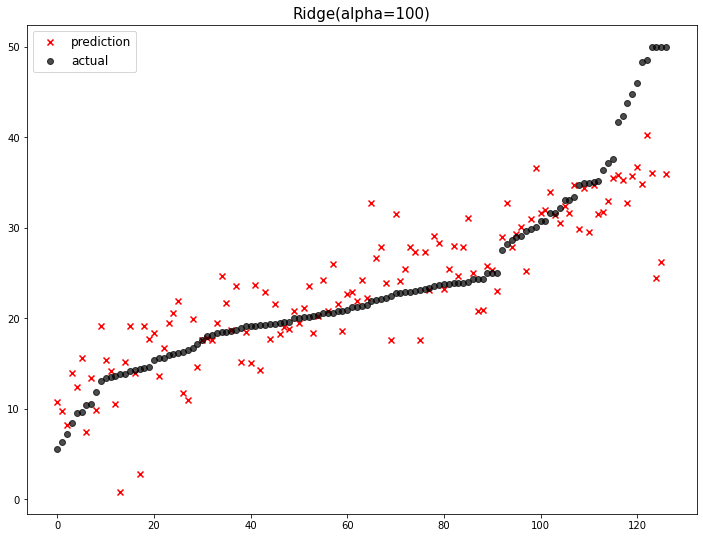

                model        mse
0    Ridge(alpha=100)  30.972743
1     Ridge(alpha=10)  30.203143
2               Ridge  29.675836
3      Ridge(alpha=1)  29.675836
4   Ridge(alpha=0.01)  29.075733
5  Ridge(alpha=0.001)  29.067346
6   Linear Regression  29.066411


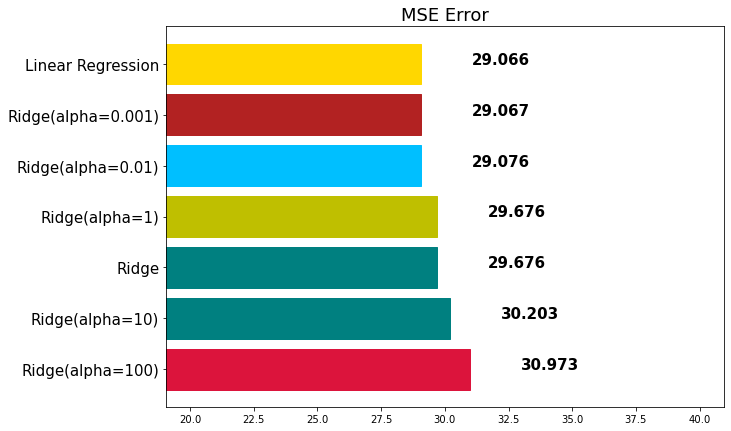

In [28]:
alpha = [0.001, 0.01, 1, 10, 100]
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval(f'Ridge(alpha={a})', pred, y_test)

In [29]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

In [30]:
# 가중치 벡터
ridge.coef_

array([-1.12547759e-01,  4.25821957e-02, -4.01125264e-02,  2.97203631e+00,
       -7.62587559e+00,  4.25789217e+00, -1.37700353e-02, -1.38937304e+00,
        2.91528475e-01, -1.49683422e-02, -8.14805540e-01,  7.26039159e-03,
       -4.96766469e-01])

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
pd.DataFrame(list(zip(x_train.columns, ridge.coef_))).sort_values(by=1)

,0,1
4,NOX,-7.625876
7,DIS,-1.389373
10,PTRATIO,-0.814806
12,LSTAT,-0.496766
0,CRIM,-0.112548
2,INDUS,-0.040113
9,TAX,-0.014968
6,AGE,-0.013770
11,B,0.007260
1,ZN,0.042582


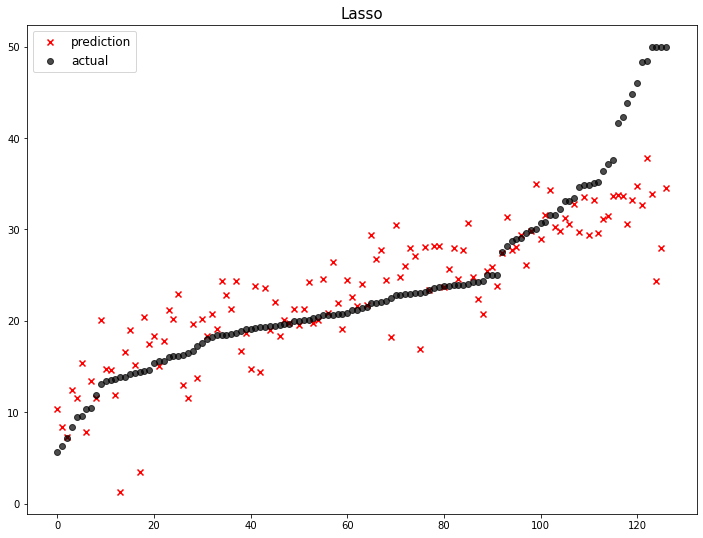

                model        mse
0               Lasso  33.302928
1    Ridge(alpha=100)  30.972743
2     Ridge(alpha=10)  30.203143
3               Ridge  29.675836
4      Ridge(alpha=1)  29.675836
5   Ridge(alpha=0.01)  29.075733
6  Ridge(alpha=0.001)  29.067346
7   Linear Regression  29.066411


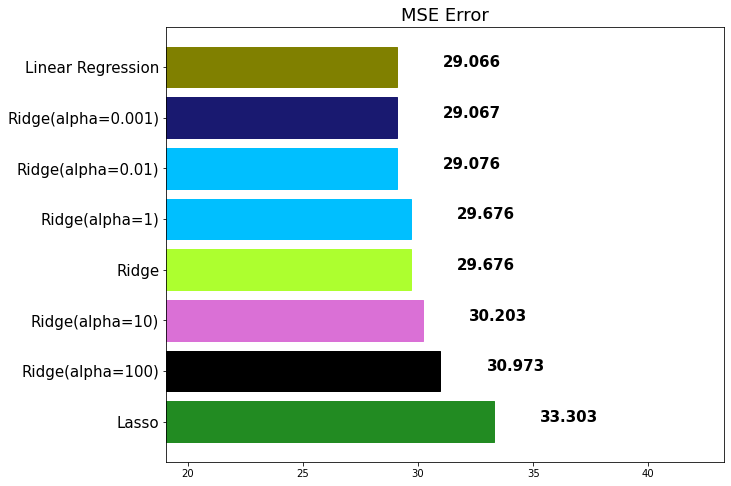

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso', pred, y_test)

In [37]:
lasso.coef_

array([-0.07872415,  0.05070249, -0.01352938,  0.        , -0.        ,
        0.95741183,  0.01857141, -0.70902425,  0.28095757, -0.01729482,
       -0.7022499 ,  0.00588176, -0.72236928])

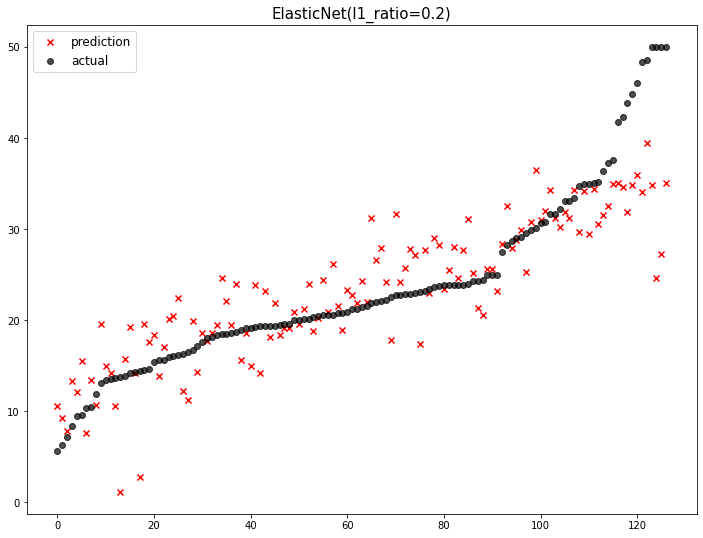

                      model        mse
0                     Lasso  33.302928
1  ElasticNet(l1_ratio=0.2)  31.779946
2          Ridge(alpha=100)  30.972743
3           Ridge(alpha=10)  30.203143
4                     Ridge  29.675836
5            Ridge(alpha=1)  29.675836
6         Ridge(alpha=0.01)  29.075733
7        Ridge(alpha=0.001)  29.067346
8         Linear Regression  29.066411


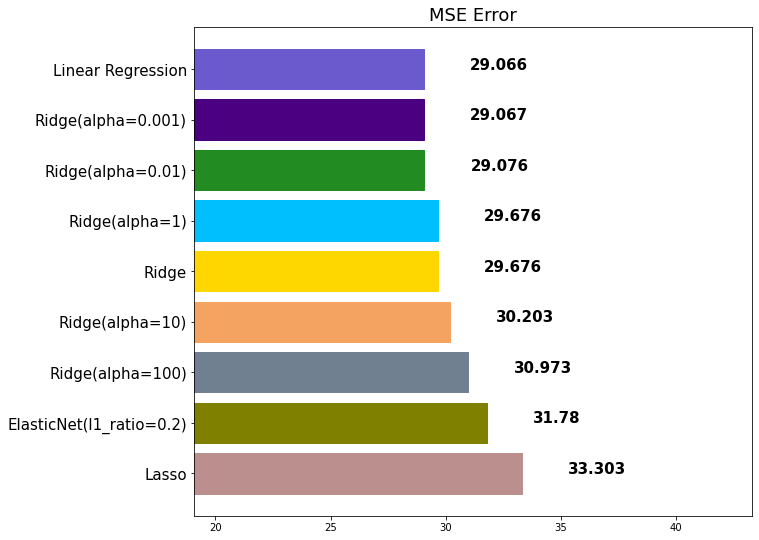

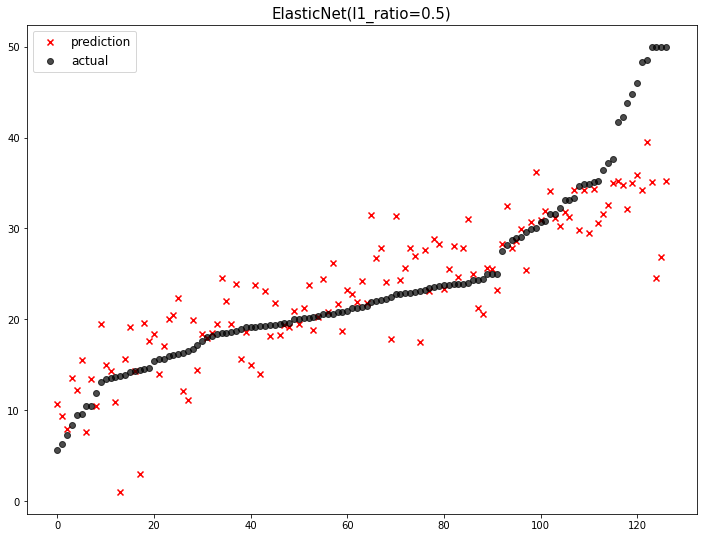

                      model        mse
0                     Lasso  33.302928
1  ElasticNet(l1_ratio=0.2)  31.779946
2  ElasticNet(l1_ratio=0.5)  31.588999
3          Ridge(alpha=100)  30.972743
4           Ridge(alpha=10)  30.203143
5                     Ridge  29.675836
6            Ridge(alpha=1)  29.675836
7         Ridge(alpha=0.01)  29.075733
8        Ridge(alpha=0.001)  29.067346
9         Linear Regression  29.066411


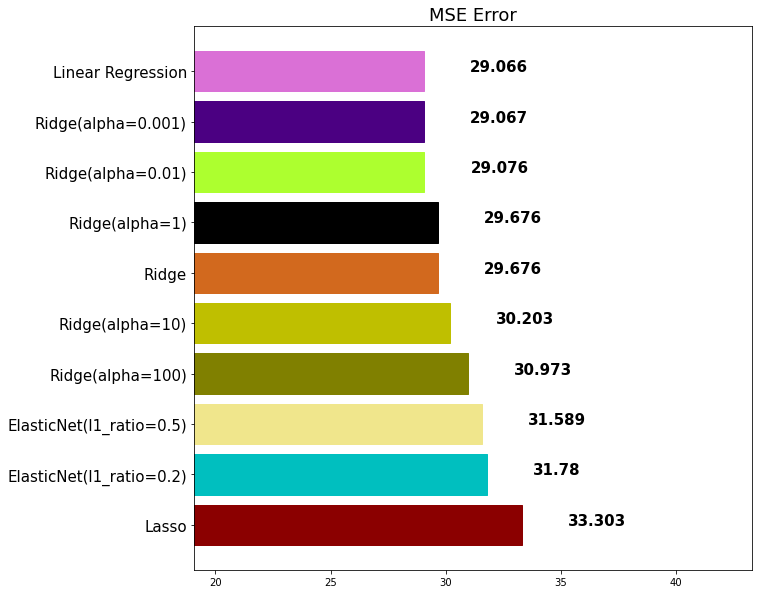

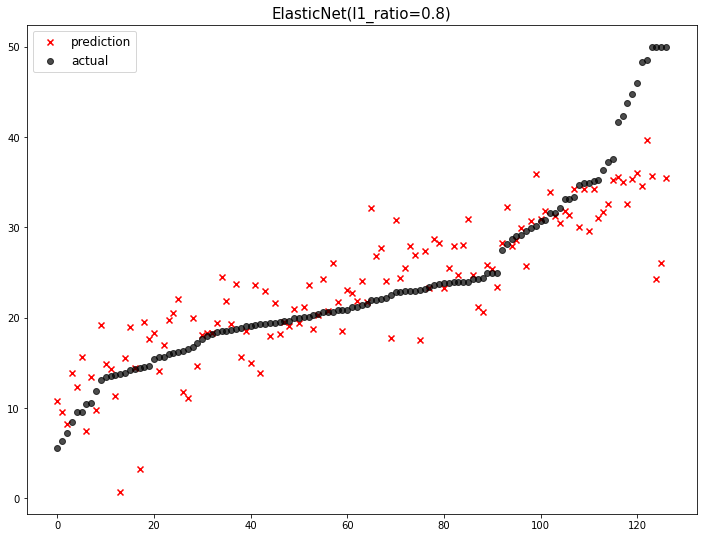

                       model        mse
0                      Lasso  33.302928
1   ElasticNet(l1_ratio=0.2)  31.779946
2   ElasticNet(l1_ratio=0.5)  31.588999
3   ElasticNet(l1_ratio=0.8)  31.214811
4           Ridge(alpha=100)  30.972743
5            Ridge(alpha=10)  30.203143
6                      Ridge  29.675836
7             Ridge(alpha=1)  29.675836
8          Ridge(alpha=0.01)  29.075733
9         Ridge(alpha=0.001)  29.067346
10         Linear Regression  29.066411


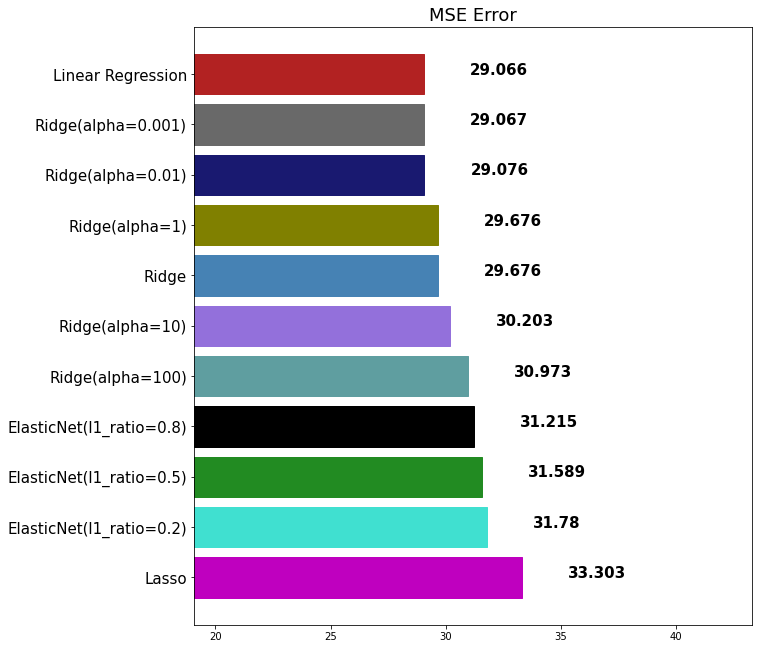

In [38]:
# ElasticNet
# l1_ratio : 1 (L1 규제만 사용)
# l1_ratio : 0 (L2 규제만 사용)
from sklearn.linear_model import ElasticNet
ratio = [0.2, 0.5, 0.8]
for r in ratio:
    model = ElasticNet(alpha=0.5, l1_ratio=r)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(r), pred, y_test)

### 스케일링

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.876072,10.745383,11.307968,0.058047,0.558788,6.262121,68.300792,3.784743,9.839050,414.060686,18.489446,355.955356,12.853668
std,9.344122,22.725745,6.959130,0.234142,0.117700,0.673618,28.391155,2.109316,8.937937,172.303562,2.165725,93.383890,7.097960
min,0.010960,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.190000,0.000000,0.453000,5.882500,42.350000,2.087550,4.000000,280.500000,17.400000,374.710000,7.240000
50%,0.279570,0.000000,9.690000,0.000000,0.538000,6.209000,78.700000,3.099300,5.000000,337.000000,19.100000,391.340000,11.660000
75%,4.067905,12.500000,18.100000,0.000000,0.647000,6.584500,94.200000,5.222850,24.000000,666.000000,20.200000,396.260000,17.155000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [41]:
# StandardScaler
# 평균 : 0, 표준편차 : 1
sscaler = StandardScaler()
result = sscaler.fit_transform(x_train) # 실제는 x_train 전체가 아니라 원하는 것만 넣어야함, 현재는 모든 데이터가 전처리 되어있어서 가능하나, 관심있는것만 하는것이 좋음
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.000053,0.002744,0.000739,-0.001557,-0.000818,-0.000158,0.000185,-0.000132,0.001794,-0.000501,-0.000211,0.000422,-0.000026
std,1.001105,0.999885,1.001596,1.002129,1.001378,1.001493,1.001266,1.001318,1.002391,0.999315,1.000416,1.001426,1.001373
min,-0.410000,-0.470000,-1.560000,-0.250000,-1.480000,-4.020000,-2.310000,-1.260000,-0.990000,-1.320000,-2.720000,-3.810000,-1.570000
25%,-0.410000,-0.470000,-0.880000,-0.250000,-0.900000,-0.565000,-0.915000,-0.810000,-0.650000,-0.775000,-0.500000,0.200000,-0.790000
50%,-0.390000,-0.470000,-0.230000,-0.250000,-0.180000,-0.080000,0.370000,-0.330000,-0.540000,-0.450000,0.280000,0.380000,-0.170000
75%,0.020000,0.080000,0.980000,-0.250000,0.750000,0.480000,0.915000,0.685000,1.590000,1.460000,0.790000,0.430000,0.610000
max,9.120000,3.710000,2.360000,4.030000,2.660000,3.660000,1.120000,3.960000,1.590000,1.730000,1.620000,0.440000,3.400000


In [42]:
# MinMaxScaler
# 0~1 사이로 정규화
sscaler = MinMaxScaler()
result = sscaler.fit_transform(x_train)
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000,379.000000
mean,0.042876,0.112876,0.398654,0.058047,0.356649,0.523351,0.673509,0.241504,0.383325,0.432322,0.62628,0.896939,0.315673
std,0.105125,0.238947,0.255911,0.234142,0.241985,0.130387,0.292218,0.191850,0.389119,0.327018,0.23072,0.235405,0.201252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.170000,0.000000,0.140000,0.450000,0.410000,0.090000,0.130000,0.180000,0.51000,0.940000,0.160000
50%,0.000000,0.000000,0.340000,0.000000,0.310000,0.510000,0.780000,0.180000,0.170000,0.290000,0.69000,0.990000,0.280000
75%,0.050000,0.130000,0.650000,0.000000,0.540000,0.585000,0.940000,0.370000,1.000000,0.910000,0.81000,1.000000,0.440000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [43]:
# RobustScaler
# 중앙값 : 0, IQR : 1
# 이상치(Outlier) 처리에 유용함
sscaler = RobustScaler()
result = sscaler.fit_transform(x_train)
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000
mean,0.902322,0.859631,0.125462,0.058047,0.107889,0.075726,-0.200633,0.218681,0.241953,0.198338,-0.218470,-1.64153,0.120369
std,2.344398,1.818060,0.539140,0.234142,0.606996,0.959606,0.547675,0.672984,0.446897,0.445948,0.772672,4.33364,0.715680
min,-0.070000,0.000000,-0.710000,0.000000,-0.790000,-3.770000,-1.460000,-0.630000,-0.200000,-0.390000,-2.320000,-18.14000,-1.000000
25%,-0.050000,0.000000,-0.350000,0.000000,-0.440000,-0.465000,-0.700000,-0.320000,-0.050000,-0.150000,-0.610000,-0.77000,-0.445000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.950000,1.000000,0.650000,0.000000,0.560000,0.535000,0.300000,0.675000,0.950000,0.850000,0.390000,0.23000,0.550000
max,22.250000,7.600000,1.400000,1.000000,1.720000,3.580000,0.410000,2.880000,0.950000,0.970000,1.040000,0.26000,2.550000


### 파이프라인

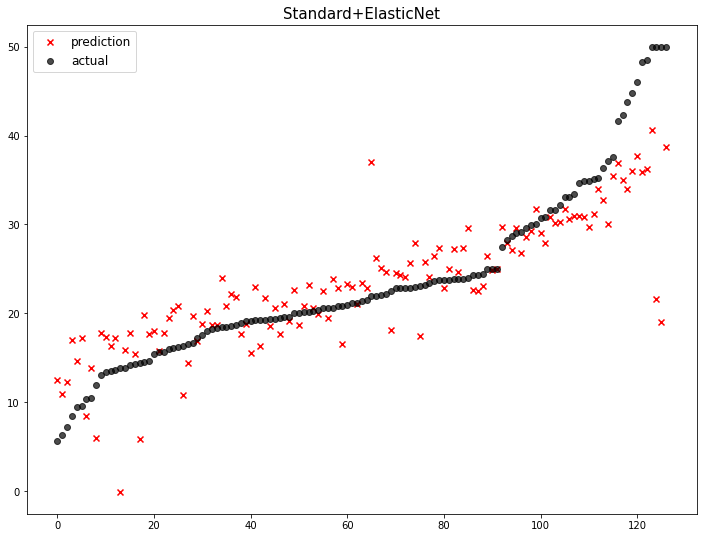

                       model        mse
0                      Lasso  33.302928
1        Standard+ElasticNet  33.175890
2   ElasticNet(l1_ratio=0.2)  31.779946
3   ElasticNet(l1_ratio=0.5)  31.588999
4   ElasticNet(l1_ratio=0.8)  31.214811
5           Ridge(alpha=100)  30.972743
6            Ridge(alpha=10)  30.203143
7                      Ridge  29.675836
8             Ridge(alpha=1)  29.675836
9          Ridge(alpha=0.01)  29.075733
10        Ridge(alpha=0.001)  29.067346
11         Linear Regression  29.066411


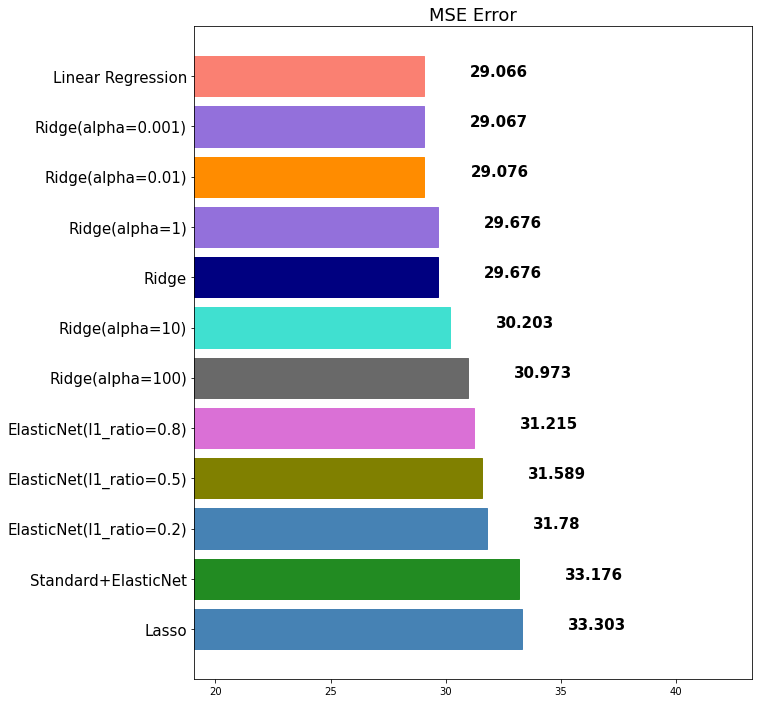

In [45]:
from sklearn.pipeline import make_pipeline
# stdscaler + elasticnet
ep = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.8))
ep.fit(x_train, y_train)
pred = ep.predict(x_test)
mse_eval('Standard+ElasticNet', pred, y_test)

### Polynomial Features
* 다항식 계수를 사용해서 새로운 feature 생성 (feature들간에 상호작용)
* feature : a, b (degree=2) -> (1, a, b, aa, ab, bb)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(x_train)[0]

array([1.00000000e+00, 8.15174000e+00, 0.00000000e+00, 1.81000000e+01,
       0.00000000e+00, 7.00000000e-01, 5.39000000e+00, 9.89000000e+01,
       1.72810000e+00, 2.40000000e+01, 6.66000000e+02, 2.02000000e+01,
       3.96900000e+02, 2.08500000e+01, 6.64508650e+01, 0.00000000e+00,
       1.47546494e+02, 0.00000000e+00, 5.70621800e+00, 4.39378786e+01,
       8.06207086e+02, 1.40870219e+01, 1.95641760e+02, 5.42905884e+03,
       1.64665148e+02, 3.23542561e+03, 1.69963779e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.27610000e+02,
       0.00000000e+00, 1.26700000e+01, 9.75590000e+01, 1.79009000e+03,
       3.12786100e+01, 4.34400000e+02, 1.20546000e+04, 3.65620000e+02,
       7.18389000e+03, 3.77385000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

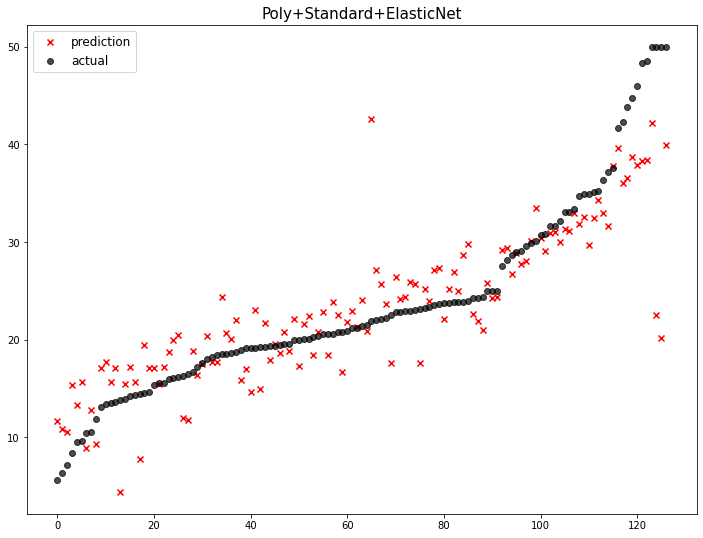

                       model        mse
0                      Lasso  33.302928
1        Standard+ElasticNet  33.175890
2   ElasticNet(l1_ratio=0.2)  31.779946
3   ElasticNet(l1_ratio=0.5)  31.588999
4   ElasticNet(l1_ratio=0.8)  31.214811
5           Ridge(alpha=100)  30.972743
6            Ridge(alpha=10)  30.203143
7                      Ridge  29.675836
8             Ridge(alpha=1)  29.675836
9   Poly+Standard+ElasticNet  29.457903
10         Ridge(alpha=0.01)  29.075733
11        Ridge(alpha=0.001)  29.067346
12         Linear Regression  29.066411


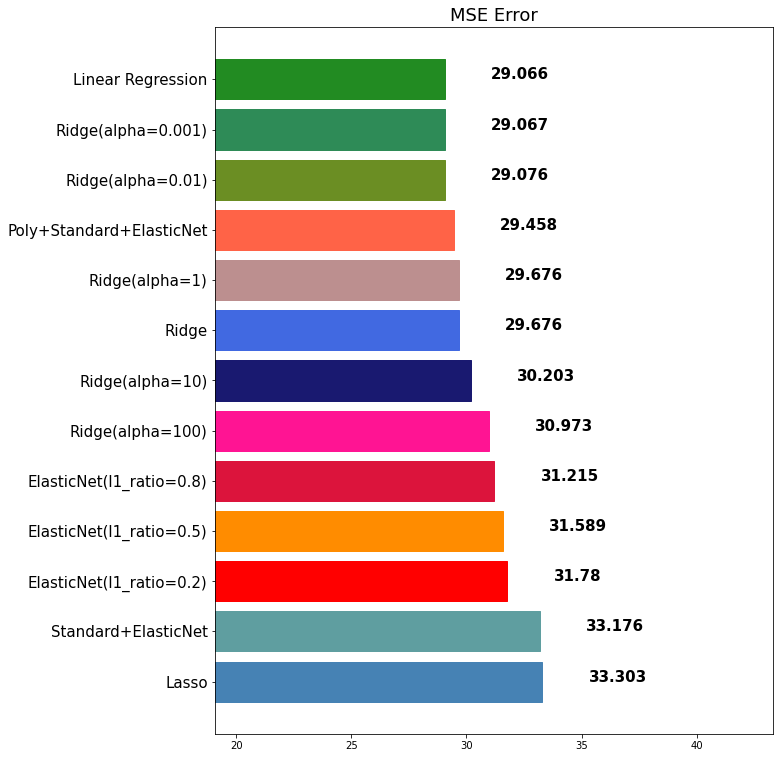

In [52]:
# polynomial + scaler + elasticNet
ep = make_pipeline(PolynomialFeatures(degree=2),
                   StandardScaler(), 
                   ElasticNet(alpha=0.5, l1_ratio=0.8))
ep.fit(x_train, y_train)
pred = ep.predict(x_test)
mse_eval('Poly+Standard+ElasticNet', pred, y_test)

### 앙상블(Ensemble)

In [53]:
from sklearn.ensemble import VotingRegressor
models = [
    ('LR', LinearRegression()),
    ('Ridge', ridge),
    ('Lasso', lasso),
    ('ep', ep)
]
vr = VotingRegressor(models)

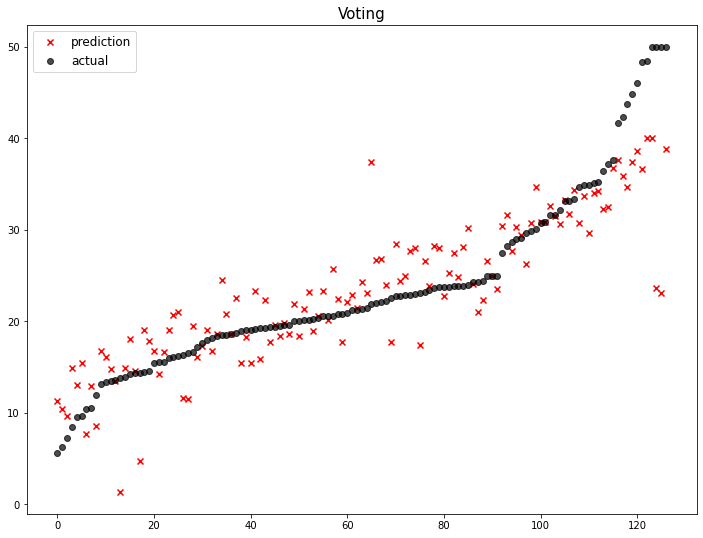

                       model        mse
0                      Lasso  33.302928
1        Standard+ElasticNet  33.175890
2   ElasticNet(l1_ratio=0.2)  31.779946
3   ElasticNet(l1_ratio=0.5)  31.588999
4   ElasticNet(l1_ratio=0.8)  31.214811
5           Ridge(alpha=100)  30.972743
6            Ridge(alpha=10)  30.203143
7                      Ridge  29.675836
8             Ridge(alpha=1)  29.675836
9   Poly+Standard+ElasticNet  29.457903
10         Ridge(alpha=0.01)  29.075733
11        Ridge(alpha=0.001)  29.067346
12         Linear Regression  29.066411
13                    Voting  28.618722


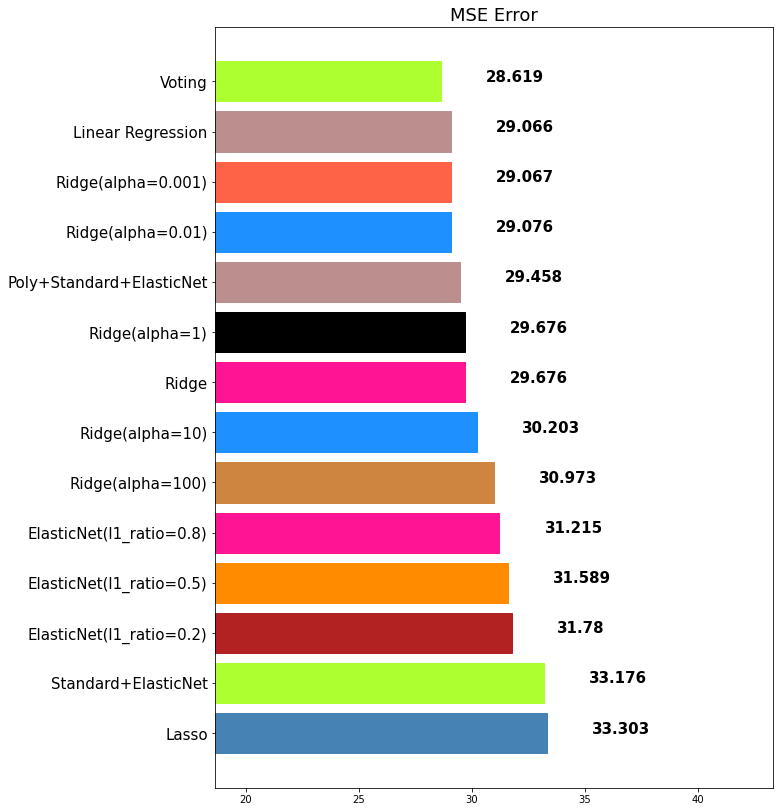

In [54]:
vr.fit(x_train, y_train)
pred = vr.predict(x_test)
mse_eval('Voting', pred, y_test)